# Predicting Heart Diseases - Cleveland UCI Data 
Dataset acquired from https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

## Attributes 
*Copied from kaggle.com*

1. **age**: age in years
2. **sex**: sex (1 = male; 0 = female)
3. **cp**: chest pain type (0: typical angina; 1: atypical angina; 2: non-anginal pain; asymptomatic)
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results (0: normal; 1:having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak** = ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment (0: upsloping; 1: flat; 2: downsloping)
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: 0 = normal; 1 = fixed defect; 2 = reversable defect

## Label
condition: 0 = no disease, 1 = disease

### Creators:
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbr
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
- Donor: David W. Aha (aha'@'ics.uci.edu) (714) 856-8779

## Disease Prediction
Predicting if a person is suffering from a heart disease (unspecified)

### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Pandas display options
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 32)

# Get rid of training warnings
import warnings
warnings.filterwarnings('ignore')

## Exploring the Data Frame

In [2]:
# Read from CSV
df = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [4]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.941562    0.469761    1.166123    0.618187    0.938965   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    1.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    3.000000   

             thal   condition  
count  297.000000  297.000000  
mean     0.835017    0.461279  
std      0.956690    0.499340  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      2.000000    1.000000  
max      2.000000    1.000000

### Checking ratios of target data classes

<Axes: xlabel='condition', ylabel='count'>

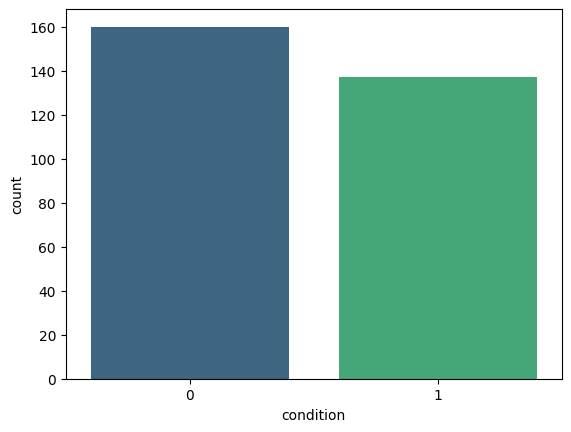

In [5]:
sns.countplot(x='condition',data=df,palette='viridis')

In [6]:
(healthy, ill) = df['condition'].value_counts()

total = healthy + ill
h_ratio = healthy/total
i_ratio = ill/total

print(f"Healthy: {h_ratio:4.2}%", f"Ill: {i_ratio:4.2}%", sep="\n")

Healthy: 0.54%
Ill: 0.46%


This means that our dataframe contains a good ratio between the target classes

## Feature Selection

<Axes: >

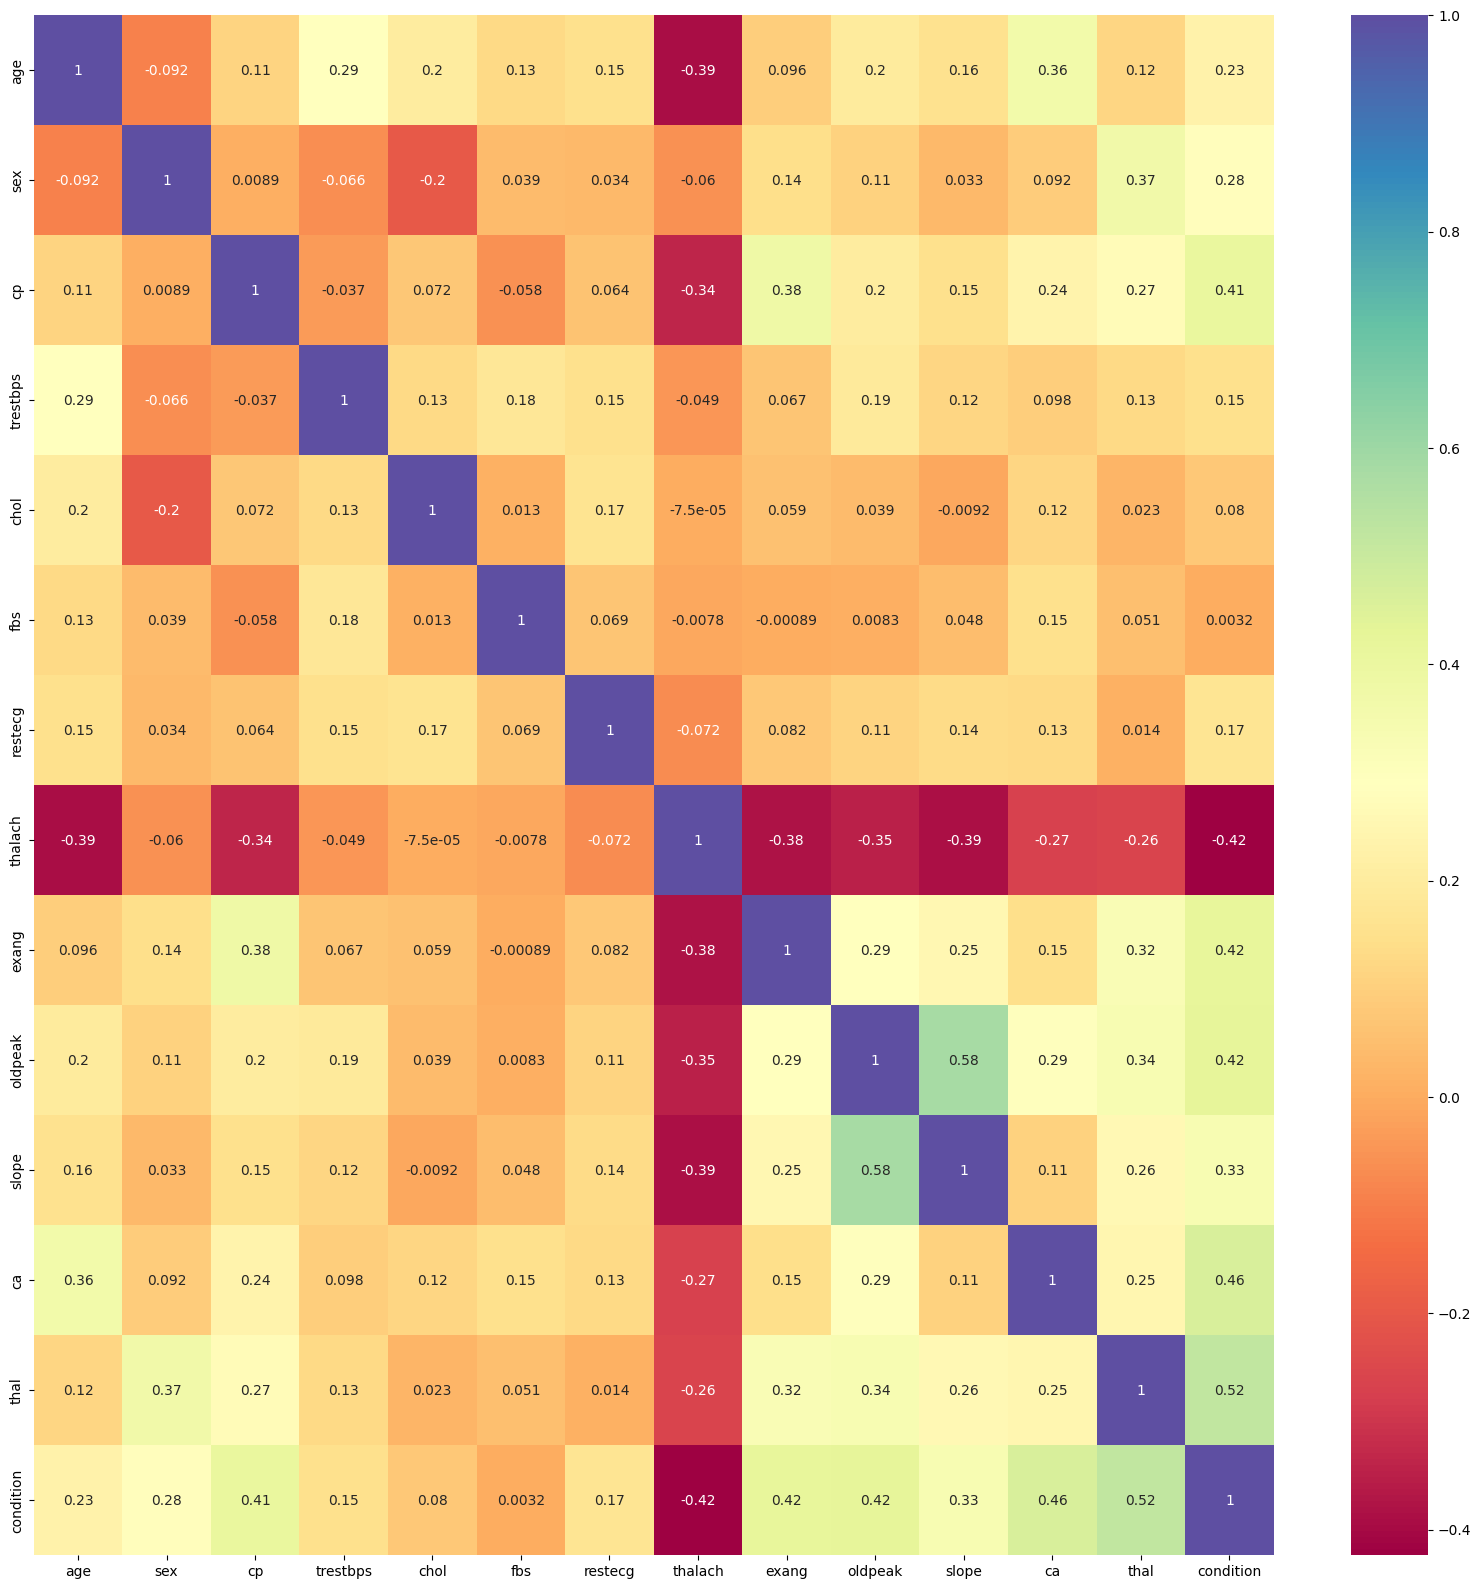

In [7]:
# Checking correlations
corr_df = df.corr()
features = corr_df.index 

plt.figure(figsize=(20,20))

sns.heatmap(df[features].corr(),annot=True,cmap="Spectral") 

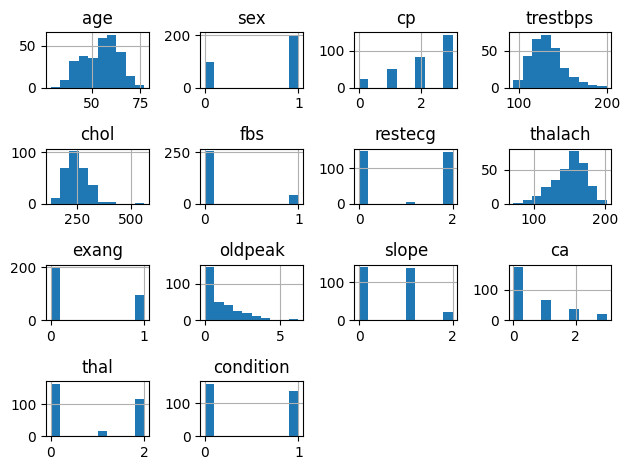

<Figure size 5000x2000 with 0 Axes>

In [8]:
df.hist()

# Decluttering subplots
plt.tight_layout()
plt.figure(figsize=(50,20))
plt.subplots_adjust(hspace=2.0, wspace=0.5)

**Here, categorical data is clearly visible. We have to generate dummies and scale the non-categorical data to best fit the model**

In [9]:
CATEGORICAL_COLUMNS = ['cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
SCALABLE_COLUMNS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### One-hot encoding

In [10]:
data = pd.get_dummies(df, columns = CATEGORICAL_COLUMNS)

In [11]:
data.head()

age  sex  trestbps  chol  fbs  thalach  oldpeak  condition  cp_0   cp_1  \
0   69    1       160   234    1      131      0.1          0  True  False   
1   69    0       140   239    0      151      1.8          0  True  False   
2   66    0       150   226    0      114      2.6          0  True  False   
3   65    1       138   282    1      174      1.4          1  True  False   
4   64    1       110   211    0      144      1.8          0  True  False   

    cp_2   cp_3  restecg_0  restecg_1  restecg_2  exang_0  exang_1  slope_0  \
0  False  False      False      False       True     True    False    False   
1  False  False       True      False      False     True    False     True   
2  False  False       True      False      False     True    False    False   
3  False  False      False      False       True     True    False    False   
4  False  False      False      False       True    False     True    False   

   slope_1  slope_2   ca_0   ca_1   ca_2   ca_3  thal_0  thal_1  thal_2  
0     True    False  False   True  False  False    True   False   False  
1    False    False  False  False   True  False    True   False   False  
2    False     True   True  False  False  False    True   False   False  
3     True    False  False   True  False  False    True   False   False  
4     True    False   True  False  False  False    True   False   False

### Scaling Data

In [12]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
data[SCALABLE_COLUMNS] = standardScaler.fit_transform(data[SCALABLE_COLUMNS])


In [13]:
data.head()

age  sex  trestbps      chol  fbs   thalach   oldpeak  condition  \
0  1.600302    1  1.596266 -0.257179    1 -0.812095 -0.820813          0   
1  1.600302    0  0.468418 -0.160859    0  0.061157  0.639470          0   
2  1.268242    0  1.032342 -0.411292    0 -1.554358  1.326662          0   
3  1.157555    1  0.355633  0.667499    1  1.065396  0.295874          1   
4  1.046868    1 -1.223355 -0.700254    0 -0.244481  0.639470          0   

   cp_0   cp_1   cp_2   cp_3  restecg_0  restecg_1  restecg_2  exang_0  \
0  True  False  False  False      False      False       True     True   
1  True  False  False  False       True      False      False     True   
2  True  False  False  False       True      False      False     True   
3  True  False  False  False      False      False       True     True   
4  True  False  False  False      False      False       True    False   

   exang_1  slope_0  slope_1  slope_2   ca_0   ca_1   ca_2   ca_3  thal_0  \
0    False    False     True    False  False   True  False  False    True   
1    False     True    False    False  False  False   True  False    True   
2    False    False    False     True   True  False  False  False    True   
3    False    False     True    False  False   True  False  False    True   
4     True    False     True    False   True  False  False  False    True   

   thal_1  thal_2  
0   False   False  
1   False   False  
2   False   False  
3   False   False  
4   False   False

### Separating target column from features

In [14]:
# Features are noted as X
X = data.drop(['condition'], axis=1) # columns = axis 1

# Target column is noted as y
y = data['condition']

# Fitting models
Will be utilizing three different approaches to measure performance individually

### K-Nearest Neighbors

In k-fold cross-validation, the dataset is **split into k subsets (folds), and the model is trained and evaluated k times**. In each iteration, one fold is used as the validation set, and the remaining k-1 folds are used for training. This process is repeated for all folds, and **the performance scores are averaged to obtain a more robust estimate of the model's performance**.

Then we select the best number for k given all of the performances

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

NUMBER_OF_TESTS = 15

k_performance = [] # Value at 0 for 0 neighbors

# Looping through different K-values
for k in range(1, NUMBER_OF_TESTS): # Arbitrary
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10) # Ten-fold cross-validation
    k_performance.append(score.mean())

Text(0, 0.5, 'Scores')

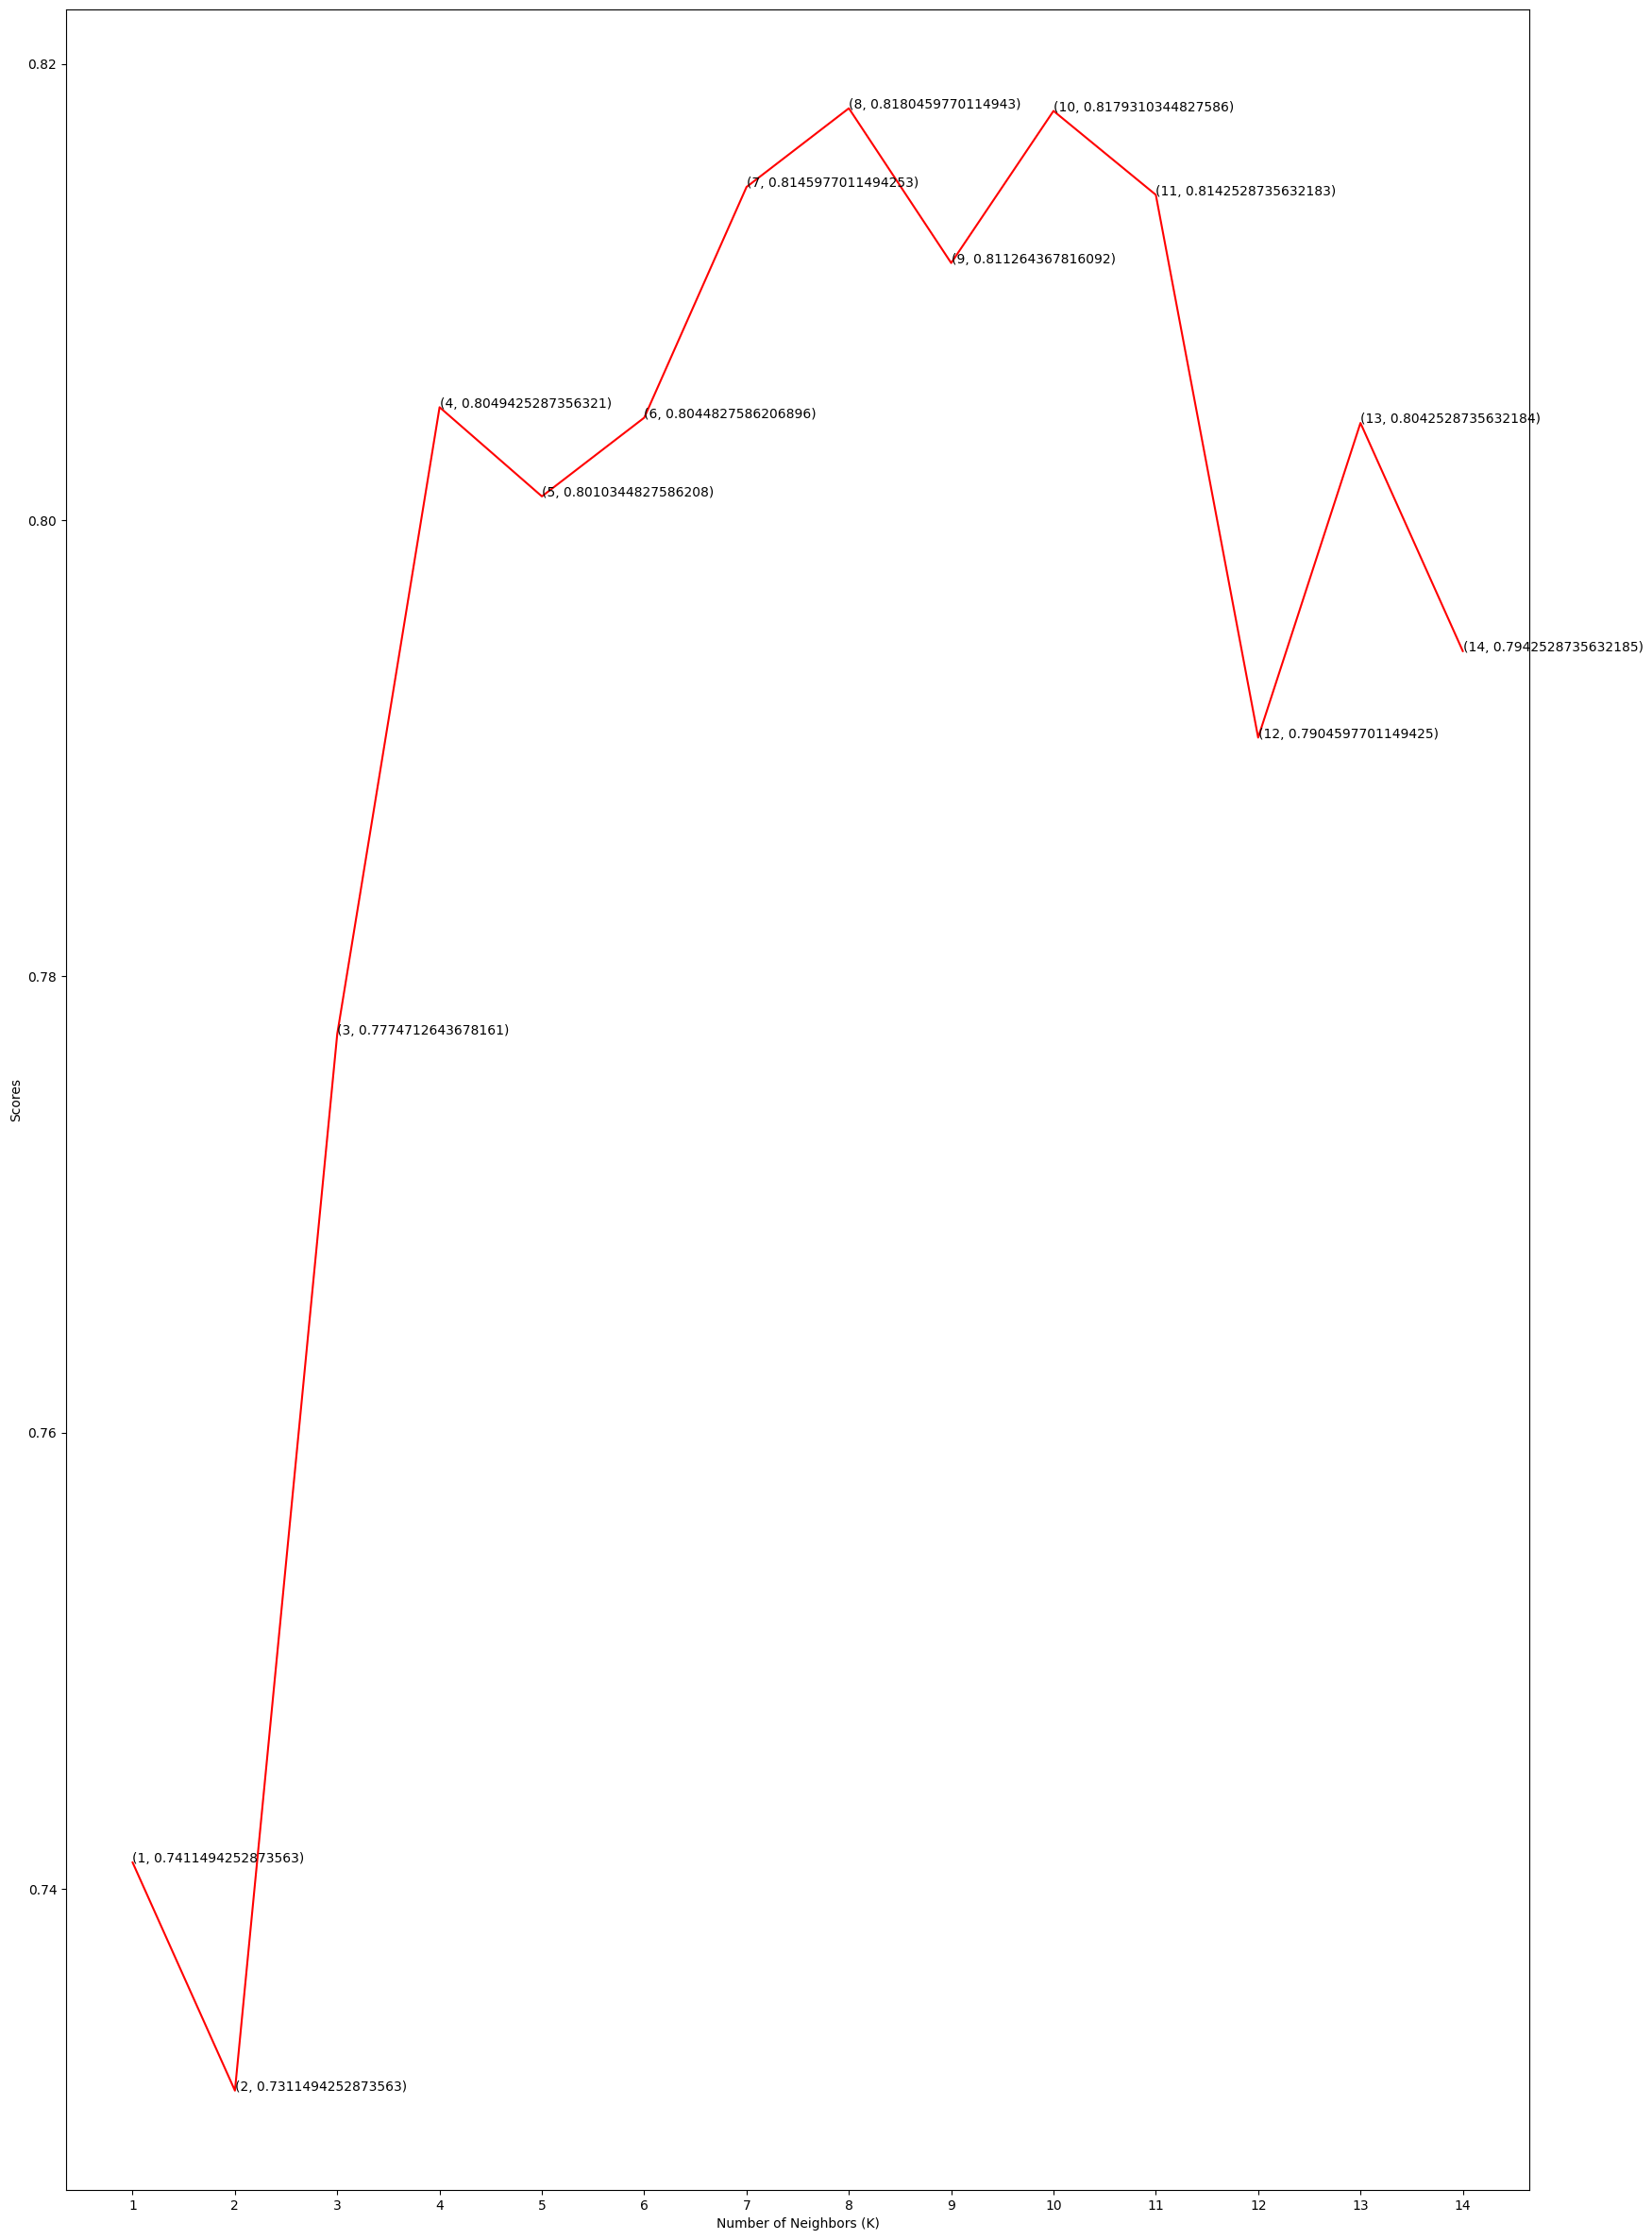

In [16]:
plt.figure(figsize=(20,30))

# Setting ticks
plt.plot([k for k in range(1, NUMBER_OF_TESTS)], k_performance, color = 'red')
for i in range(1,NUMBER_OF_TESTS):
    plt.text(i, k_performance[i-1], (i, k_performance[i-1]))
    
# Reducing font size
plt.rcParams['font.size'] = 10

# Labeling graph
plt.xticks([i for i in range(1, NUMBER_OF_TESTS)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')

**Best Number for K = 8**

In [17]:
knn = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn,X,y,cv=10)
KNN_PERFORMANCE = score.mean()


### Decision Tree

Decision Trees make decisions or predictions by recursively splitting the data into subsets based on the values of input features. Each internal node of the tree represents a decision based on a specific feature, and each leaf node represents a class label (in classification) or a predicted value (in regression).

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Split the data into test and train sets. Default ratio is 80%-20%
X_train, X_test, y_train, y_test = train_test_split(data.drop(['condition'],axis=1), data['condition'], random_state=42)

# Create DTC -> Classification task! 
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
plt.figure(figsize=(200,100))

# Plot the decision tree
plot_tree(dtc.fit(X_train, y_train),
         filled=True,
         rounded=True,
         class_names=["Heart Disease", 'No Heart Disease'],
         feature_names=data.drop(['condition'], axis=1).columns)
plt.show()

### Predicting and Evaluating with the Decision Tree

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Prediction
y_pred = dtc.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))

DT_PERFORMANCE = accuracy_score(y_test, y_pred)


[[26 12]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        38
           1       0.71      0.81      0.76        37

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75



In the confusion matrix, 68% (26) of healthy people were correctly classified (True Negatives) and 81%(30) of people with heart diseases (True Positives) were correctly classified.

### Random Forest

A Random Forest Classifier is a machine learning algorithm that belongs to the ensemble learning category. It is based on the concept of constructing multiple decision trees during training and combining their predictions to make more accurate and robust classifications. Random Forests are commonly used for both classification and regression tasks.

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
CLASSIFIERS_TEST = 20

performance = [0] # index 0 offset

for n in range(1, CLASSIFIERS_TEST):
    rf_classifier = RandomForestClassifier(n_estimators=n)
    score=cross_val_score(rf_classifier,data.drop(['condition'],axis=1),data['condition'],cv=10)
    performance.append(score.mean())
best_number = performance.index(max(performance))

print(f"Best number of classifiers: {best_number}", f"Performance: {performance[best_number]}", sep='\n')

RF_PERFORMANCE = performance[best_number]

Best number of classifiers: 18
Performance: 0.8083908045977012


## Comparing the Different Approaches

In [26]:
print("Performances:",
    f"- K-Nearest Neighbors: {KNN_PERFORMANCE:4.5}%",
    f"- Decision Tree, unpruned: {DT_PERFORMANCE:4.5}%",
    f"- Random Forest: {RF_PERFORMANCE:4.5}%", sep='\n')

Performances:
- K-Nearest Neighbors: 0.81805%
- Decision Tree, unpruned: 0.74667%
- Random Forest: 0.80839%
